In [1]:
# importinng the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from pandas.plotting import lag_plot

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataet
df =pd.read_csv('day.csv',low_memory=False)
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
# chcek for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Droping the unnecesrry columns

The following variables were excluded from the analysis for the reasons outlined below:
  
  instant: This variable, serving as the serial number for each record, was considered irrelevant for the analytical           objectives.
    
  dteday: As the necessary temporal information is already encapsulated within the variables mnth and yr, this variable was       deemed redundant.
    
  casual and registered: These variables were removed as their aggregate (cnt) represents the total bike rentals, which is the   primary focus of the analysis.

In [6]:
df.drop(columns=['instant','dteday','casual','registered'],axis=1,inplace=True)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Visualizing  Variables

**Observations:**

The daily count of bike rentals shows a clear upward trend with increasing temperatures, both in terms of the actual temperature (temp) and the adjusted temperature (atemp).

The parallel behavior of temp and atemp highlights a strong correlation between these variables.

In the scatter plot of temp versus cnt, two notable outliers are observed, with temp values ranging between 15 and 30.

Similarly, the atemp versus cnt scatter plot reveals two outliers, where atemp values fall between 20 and 35.

The scatter plot of hum versus cnt identifies two outliers with humidity (hum) values below 20.

For the windspeed versus cnt scatter plot, a single outlier is evident, with a windspeed value exceeding 30.

<Figure size 1728x1152 with 0 Axes>

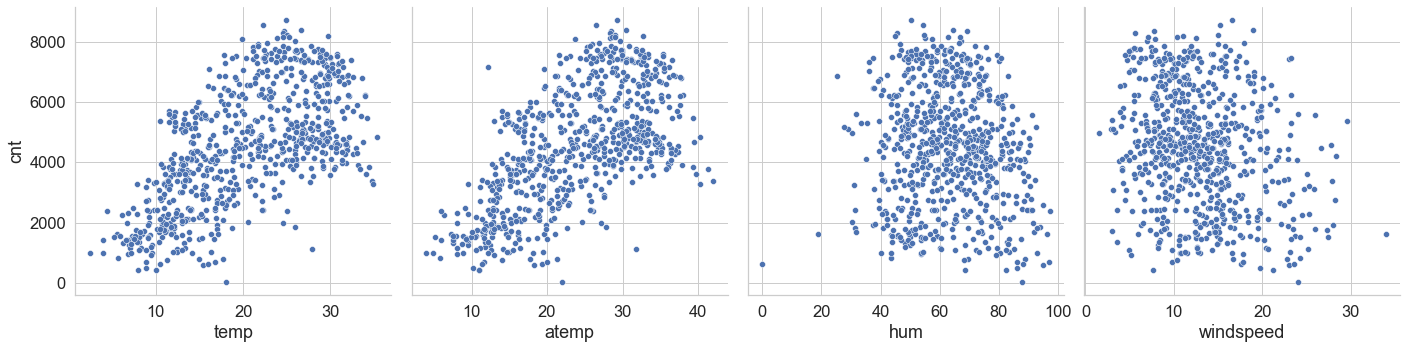

In [7]:
# Scatter Plots of Continuous variables vs 'cnt'
# Increase the figure size
plt.figure(figsize=(24, 16))

# Set the font scale to increase the font size
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.pairplot(data=df,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',kind='scatter',height=5,aspect=1);
plt.show()

## Removing Outliers from Continuous Variables


**Outliers Removal:**

Temperature (temp) Adjustments:

Exclude rows where temp falls between 15 and 20 with a bike rental count (count) below 100.
Exclude rows where temp lies between 25 and 30 with a bike rental count below 2000.


Adjusted Temperature (atemp) Refinement:
    
Remove entries where atemp is between 20 and 25, and count is less than 100.
Remove entries where atemp is between 30 and 35, and count is less than 2000.

Humidity (hum) Adjustment:
    
Discard rows with hum values below 20.
Windspeed (windspeed) Adjustment:

Eliminate rows where windspeed exceeds 30.







In [8]:
## Dropping outliers in continuous variables
# outliers in temp
df = df.drop(index = df[(df['temp'] > 15) & (df['temp'] < 20) & (df['cnt'] < 100)].index)
df = df.drop(index = df[(df['temp'] > 25) & (df['temp'] < 30) & (df['cnt'] < 2000)].index)

# outliers in atemp
df = df.drop(index = df[(df['atemp'] > 20) & (df['atemp'] < 25) & (df['cnt'] < 100)].index)
df = df.drop(index = df[(df['atemp'] > 30) & (df['atemp'] < 35) & (df['cnt'] < 2000)].index)


#outliers in hum
df = df.drop(index = df[(df['hum'] < 20)].index)

#outliers in windspeed
df = df.drop(index = df[(df['windspeed'] > 30)].index)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Correlation Analysis with Continuous Variables

 **Observations:**

Upon analyzing the correlations between selected continuous variables and the count of bike rentals (cnt), the following insights emerge:

atemp (Adjusted Temperature):
This variable demonstrates the strongest positive correlation with cnt, indicating that an increase in adjusted temperature is closely associated with a rise in bike rentals.

temp (Temperature):
While positively correlated with cnt, the strength of this relationship is slightly lower than that of atemp.

hum (Humidity):
Among the variables considered, hum exhibits the weakest correlation with cnt, suggesting that variations in humidity have a relatively limited influence on bike rental counts.

temp and atemp:
The correlation between these two variables is nearly perfect, underscoring a strong linear relationship. Given this redundancy, it may be prudent to exclude one of them in subsequent analyses to mitigate potential multicollinearity.

In [9]:
df[['temp','atemp','hum','windspeed','cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991726,0.122673,-0.160295,0.635560
atemp,0.991726,1.000000,0.136886,-0.186807,0.638918
hum,0.122673,0.136886,1.000000,-0.247498,-0.107622
windspeed,-0.160295,-0.186807,-0.247498,1.000000,-0.218150
cnt,0.635560,0.638918,-0.107622,-0.218150,1.000000


In [10]:
# dropping atemp
df = df.drop(columns=['atemp'])
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


## After excluding atemp, re-evaluating  the correlations with the remaining continuous variables.

 **Observation:**
        
There is no significant correlation between atemp and hum or windspeed.

Consequently, these variables are retained for the time being.

In [11]:
df[['temp','hum','windspeed']].corr()

,temp,hum,windspeed
temp,1.000000,0.122673,-0.160295
hum,0.122673,1.000000,-0.247498
windspeed,-0.160295,-0.247498,1.000000


### Data preparation for modeling.

 **Categorization:**

mnth: Classified into the months of the year, ranging from January to December.
    
season: Divided into four distinct categories: Spring, Summer, Fall, and Winter.
        
weathersit: Grouped into four conditions: Clear, Mist, Light Snow, and Heavy Rain.
        
weekday: Categorized by the days of the week, including Sunday (Sun), Monday (Mon), Tuesday (Tue), Wednesday (Wed), Thursday (Thu), Friday (Fri), and Saturday (Sat).

In [12]:
df['weathersit'] = df.weathersit.map({1:'Clear', 2:'Mist', 3:'Light Snow'})
df['season'] = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['mnth']=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


### Visualization of Categorical Variables

  **Observations:**

The "Season vs. Rentals per Day" plot highlights that fall records the highest average rentals, closely followed by summer.

Analyzing year-on-year trends, 2019 exhibits a median increase of 2,000 rentals compared to 2018.

The "Month-wise Rentals" plot indicates that September consistently records the highest rentals, with neighboring months also showing elevated numbers, reflecting a clear seasonal pattern.

On holidays, rental counts are generally lower than on working days, accompanied by a greater variability in demand.

Weekday rental patterns reveal no significant differences, except for Thursdays and Sundays, which display higher variability compared to other days.

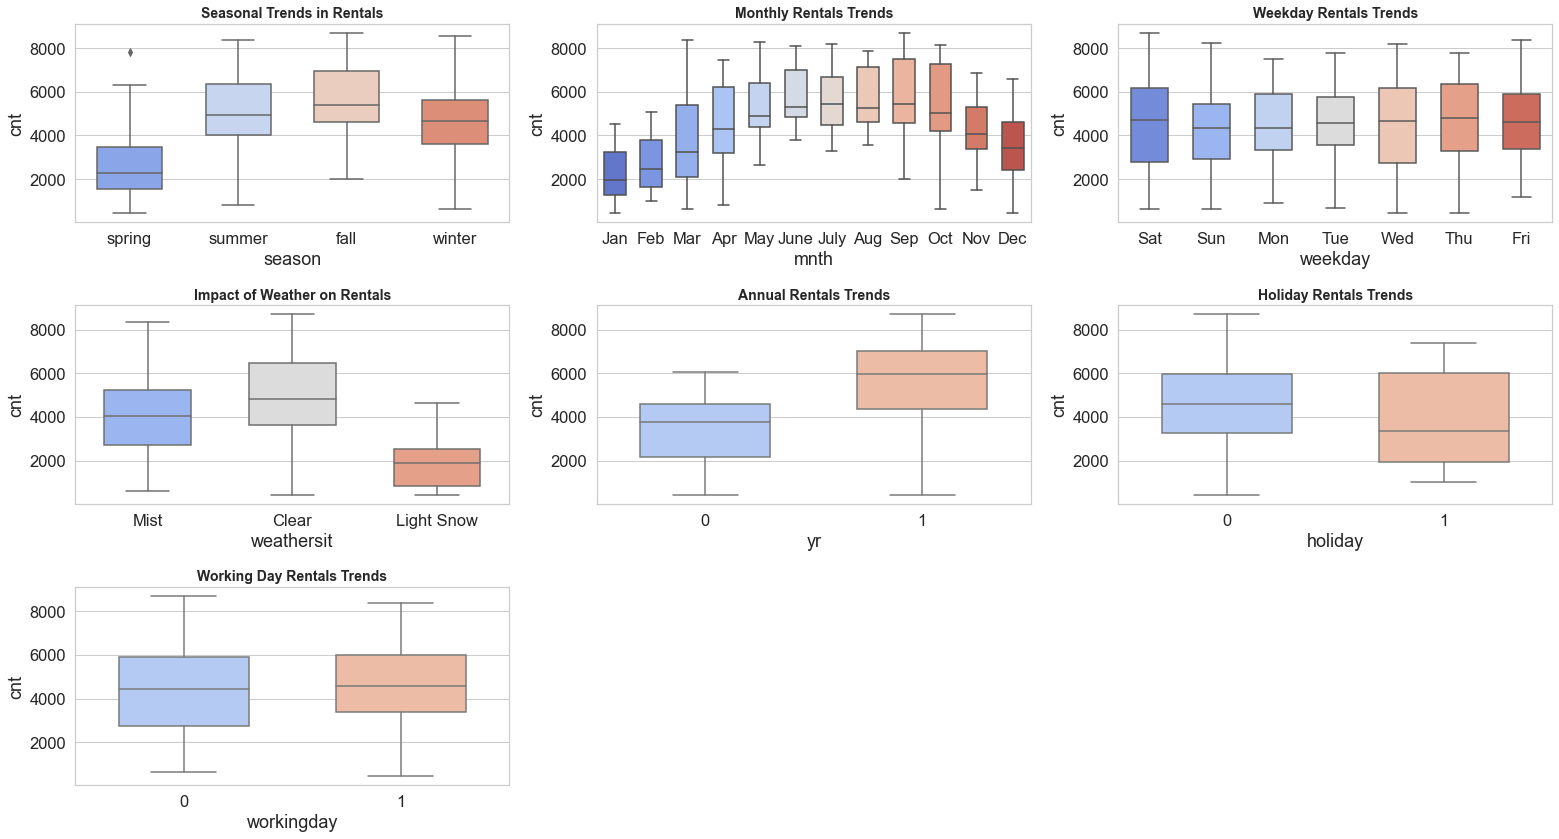

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 4 columns of subplots
plt.figure(figsize=(22, 12))

# Subplot 1: Season
plt.subplot(3, 3, 1)
sns.boxplot(x='season', y='cnt', data=df, palette='coolwarm', width=0.6)
plt.title('Seasonal Trends in Rentals', fontsize=14, fontweight='bold')

# Subplot 2: Month
plt.subplot(3, 3, 2)
sns.boxplot(x='mnth', y='cnt', data=df, palette='coolwarm', width=0.6)
plt.title('Monthly Rentals Trends', fontsize=14, fontweight='bold')

# Subplot 3: Weekday
plt.subplot(3, 3, 3)
sns.boxplot(x='weekday', y='cnt', data=df, palette='coolwarm', width=0.6)
plt.title('Weekday Rentals Trends', fontsize=14, fontweight='bold')

# Subplot 4: Weather Situation
plt.subplot(3, 3, 4)
sns.boxplot(x='weathersit', y='cnt', data=df, palette='coolwarm', width=0.6)
plt.title('Impact of Weather on Rentals', fontsize=14, fontweight='bold')

# Subplot 5: Year
plt.subplot(3, 3, 5)
sns.boxplot(x='yr', y='cnt', data=df, palette='coolwarm', width=0.6)
plt.title('Annual Rentals Trends', fontsize=14, fontweight='bold')

# Subplot 6: Holiday
plt.subplot(3, 3, 6)
sns.boxplot(x='holiday', y='cnt', data=df, palette='coolwarm', width=0.6)
plt.title('Holiday Rentals Trends', fontsize=14, fontweight='bold')

# Subplot 7: Working Day
plt.subplot(3, 3, 7)
sns.boxplot(x='workingday', y='cnt', data=df, palette='coolwarm', width=0.6)
plt.title('Working Day Rentals Trends', fontsize=14, fontweight='bold')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


###  Data Preprocessing: Addressing Outliers in Categorical Variables

In [15]:
df.drop(df[(df['season'] == 'spring') & (df['cnt'] > 7000)].index)
df['cnt'] > 7000

0      False
1      False
2      False
3      False
4      False
       ...  
725    False
726    False
727    False
728    False
729    False
Name: cnt, Length: 725, dtype: bool

## Data Preprocessing: Creating Dummy Variables for Categorical Features

To prepare categorical variables such as season, mnth, weekday, and weathersit for analysis, dummy variables were created to transform these categories into a numerical format suitable for modeling:



season_indicators: One-hot encoding was applied to the season column, with the first category dropped to mitigate multicollinearity.

mnth_indicators: Dummy variables were similarly generated for the mnth column.

weekday_indicators: The weekday column was converted into dummy variables.

weathersit_indicators: Dummy variables were also created for the weathersit column.


Updating the DataFrame:

The newly generated indicator variable columns were added to the df_bikes DataFrame.
The original categorical columns (season, mnth, weekday, and weathersit) were removed, as they were no longer required.

In [16]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [17]:
# We can see that Season and weathersit are having same kind of lables(1,2,3,4). 
# With the following simple one line of code it can automatically handles that kind of structure instead of converting labels to categorical variables. 
# creating indicator variable columns
# Creating dummy variables and ensuring they are in 0 and 1 format
season_indicators = pd.get_dummies(df['season'], drop_first=True).astype(int)
mnth_indicators = pd.get_dummies(df['mnth'], drop_first=True).astype(int)
weekday_indicators = pd.get_dummies(df['weekday'], drop_first=True).astype(int)
weathersit_indicators = pd.get_dummies(df['weathersit'], drop_first=True).astype(int)

# Adding indicator variable columns to the dataset and dropping original columns
df = pd.concat([df, season_indicators, mnth_indicators, weekday_indicators, weathersit_indicators], axis=1)
df = df.drop(columns=['season', 'mnth', 'weekday', 'weathersit'])

df.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Light Snow', 'Mist'],
      dtype='object')

## Data Splitting

The dataset is partitioned into two subsets: a training set and a test set. This segmentation is crucial for developing and validating machine learning models.

In [19]:
Df_train,Df_Test=train_test_split(df,train_size=0.7,random_state=100)
print(Df_train.shape)
print(Df_Test.shape)

(507, 29)
(218, 29)


## Data Preprocessing: Scaling Numerical Variables

In [20]:
numerical_scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed']
numerical_scaler.fit(Df_train[num_vars])
Df_train[num_vars] = numerical_scaler.fit_transform(Df_train[num_vars])
Df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
641,1,0,1,0.745598,0.634311,0.227006,7328,0,0,1,...,1,0,0,0,0,1,0,0,0,1
728,1,0,0,0.245101,0.283272,0.783361,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
478,1,0,1,0.441354,0.240538,0.541524,5633,0,1,0,...,0,0,0,0,0,0,1,0,0,0
113,0,0,0,0.651106,0.763125,0.405045,4191,0,1,0,...,0,0,0,0,1,0,0,0,0,1
685,1,0,0,0.331287,0.374237,0.375353,5629,0,0,1,...,0,0,0,1,0,0,0,0,0,0


## Checking Correlation in the Training Data
  

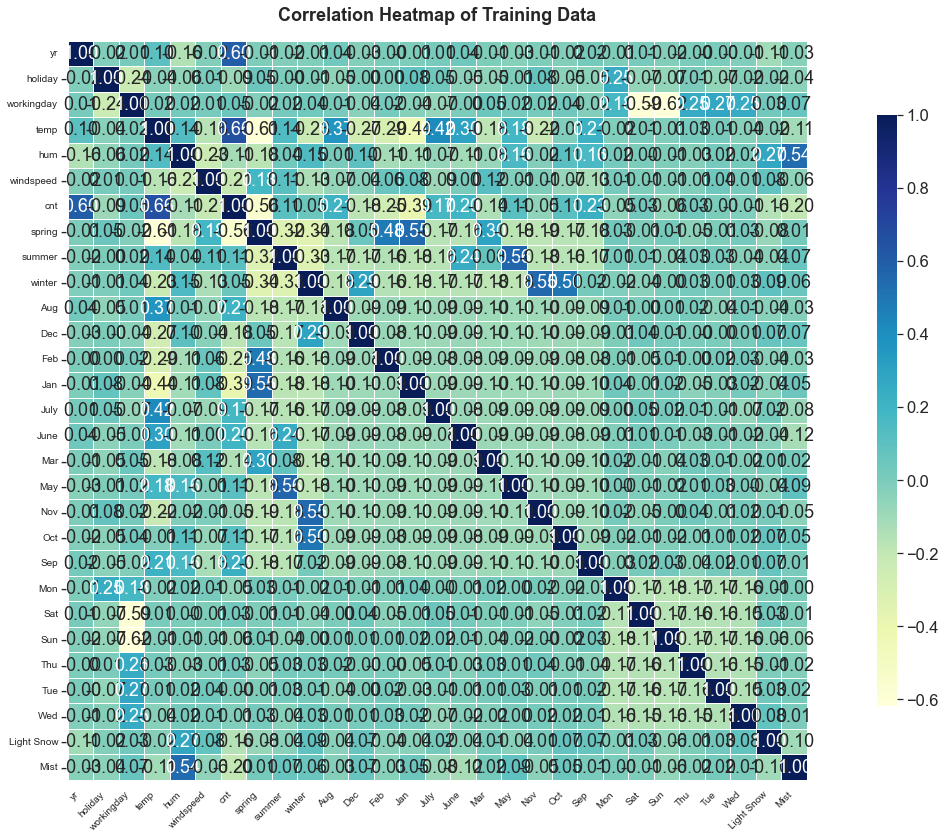

In [21]:


plt.figure(figsize=(20, 12))  # Reduced size to be visually proportional
sns.heatmap(
    Df_train.corr(),
    annot=True,
    fmt=".2f",  # Format annotations to two decimal places
    cmap="YlGnBu",  # Changed colormap to a more professional gradient
    linewidths=0.5,  # Added spacing between cells for clarity
    cbar_kws={'shrink': 0.8, 'aspect': 30},  # Adjusted color bar for proportion
    square=True  # Enforce square cells for symmetry
)
plt.title("Correlation Heatmap of Training Data", fontsize=18, fontweight='bold', pad=20)
plt.xticks(fontsize=10, rotation=45, ha="right")  # Rotated and styled x-axis labels
plt.yticks(fontsize=10, rotation=0)  # Styled y-axis labels
plt.tight_layout()
plt.show()


The correlation analysis of the training data revealed the following key insights:

temp: A strong positive correlation with bike rental counts (cnt), suggesting that higher temperatures are associated with increased rentals.

year: A notable positive correlation with cnt, potentially reflecting a year-over-year growth trend in bike rentals.

### Partitioning Independent and Dependent Variables

In [24]:
y_train = Df_train.pop('cnt')
X_train = Df_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
641,1,0,1,0.745598,0.634311,0.227006,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
728,1,0,0,0.245101,0.283272,0.783361,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
478,1,0,1,0.441354,0.240538,0.541524,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
113,0,0,0,0.651106,0.763125,0.405045,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
685,1,0,0,0.331287,0.374237,0.375353,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


# Modelling

In [25]:
# Selecting 15 Features using RFE 
lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

In [26]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
22,1,True,Sun
21,1,True,Sat
19,1,True,Sep
17,1,True,Nov
26,1,True,Light Snow
10,1,True,Dec
8,1,True,winter
27,1,True,Mist
6,1,True,spring


In [27]:
# Selected Features
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features

array(['yr', 'Sun', 'Sat', 'Sep', 'Nov', 'Light Snow', 'Dec', 'winter',
       'Mist', 'spring', 'windspeed', 'hum', 'temp', 'workingday',
       'holiday'], dtype=object)

In [28]:
def ols_fit(y, X):
    
    # Add a constant term to the independent variables
    X_train_sm = sm.add_constant(X)
    
    # Fit an OLS regression model
    model = sm.OLS(y, X_train_sm).fit()
    
    # Print the summary statistics of the regression
    print(model.summary())
    
    return model

# Function for Variance Inflation Factor (VIF) Calculation
def vif(X):
    
    # Add a constant term to the independent variables
    df = sm.add_constant(X)
    
    # Calculate the VIF for each independent variable
    vif = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    # Create a DataFrame to display VIF values
    vif_frame = pd.DataFrame({'vif': vif[0:]}, index=df.columns).reset_index()
    
    # Print the DataFrame, sorted by VIF values in descending order
    print(vif_frame.sort_values(by='vif', ascending=False))

##  Model1

* Using features selected by RFE

In [29]:
features_1 = selected_features
ols_fit(y_train,X_train[features_1])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     201.0
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          3.66e-193
Time:                        14:59:40   Log-Likelihood:                -4079.3
No. Observations:                 507   AIC:                             8189.
Df Residuals:                     492   BIC:                             8252.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1986.8185    182.021     10.915      0.0

## Model 2 :
Dropping holiday because of high p-value

In [30]:
del_feature = 'holiday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     201.0
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          3.66e-193
Time:                        14:59:40   Log-Likelihood:                -4079.3
No. Observations:                 507   AIC:                             8189.
Df Residuals:                     492   BIC:                             8252.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2027.7312    306.449      6.617      0.0

## Model 3 :
Dropping Sunday because of high p-value

In [31]:
del_feature = 'Sun'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     215.6
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          8.56e-194
Time:                        14:59:40   Log-Likelihood:                -4080.6
No. Observations:                 507   AIC:                             8189.
Df Residuals:                     493   BIC:                             8248.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2342.6069    234.075     10.008      0.0

##  Verifying MultiCollinearity

Multicollinearity Assessment:

The evaluation of multicollinearity among the selected features revealed the following insights:

The Variance Inflation Factor (VIF) for all selected features is below 5, indicating an absence of significant multicollinearity. VIF values under 5 generally suggest that the predictor variables are not strongly correlated with one another.

Furthermore, the similarity between the R-squared and adjusted R-squared values reinforces the absence of multicollinearity. This alignment suggests that the inclusion of multiple predictors does not introduce redundancy or overfitting in the regression model.

In [32]:
vif(X_train[selected_features])

         index        vif
0        const  47.112510
12        temp   2.870132
9       spring   2.637464
7       winter   2.363436
11         hum   2.093160
4          Nov   1.777281
8         Mist   1.761907
13  workingday   1.573985
2          Sat   1.565518
6          Dec   1.356272
5   Light Snow   1.287967
10   windspeed   1.148956
3          Sep   1.104835
1           yr   1.066624


In [33]:
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     215.6
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          8.56e-194
Time:                        14:59:40   Log-Likelihood:                -4080.6
No. Observations:                 507   AIC:                             8189.
Df Residuals:                     493   BIC:                             8248.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2342.6069    234.075     10.008      0.0


The model achieves an R-squared value of approximately 85%, signifying that 85% of the variance in the dependent variable (count quantity) is effectively explained by the included predictors. The adjusted R-squared value of 84.6% further confirms the model's robustness.

All feature p-values are below 0.05, indicating their statistical significance in explaining variations in the dependent variable.

The low Prob(F-statistic) underscores the model's overall suitability and strong fit to the data.

Additionally, the Variance Inflation Factor (VIF) values for all variables are below 5, satisfying the criteria for multicollinearity and confirming the absence of significant correlation among predictors.

### Residual Analysis
#### Observations:
- We can observed that the error terms follow a normal distribution.

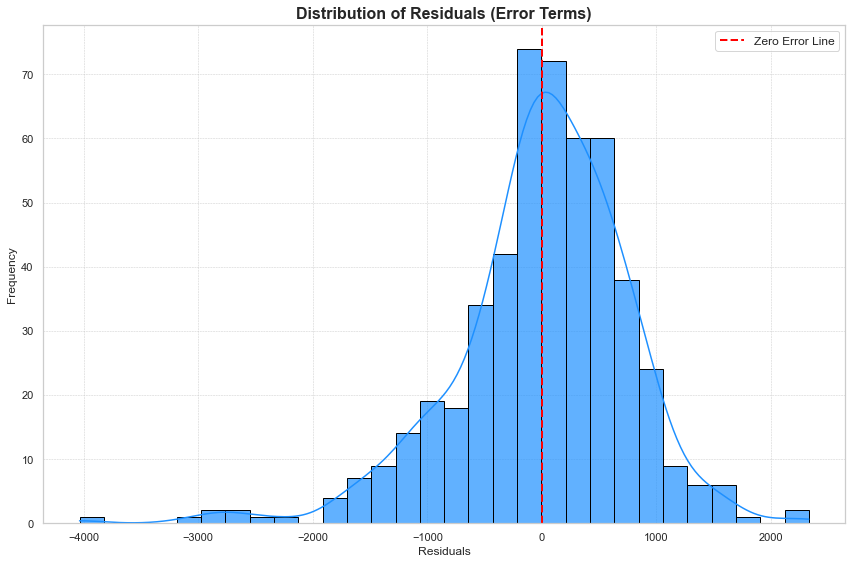

In [49]:

# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train[selected_features])
y_train_pred = final_model.predict(X_train_sm)

# Enhanced Residual Distribution Plot
plt.figure(figsize=(12, 8))  # Larger figure size for clarity
sns.histplot(
    y_train - y_train_pred,
    bins=30,
    kde=True,  # Adds a smooth Kernel Density Estimation line
    color='dodgerblue',
    edgecolor='black',
    alpha=0.7,
)
plt.title('Distribution of Residuals (Error Terms)', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Error Line')  # Highlight zero residual line
plt.legend(fontsize=12, loc='upper right')  # Legend for the zero line
plt.grid(visible=True, linestyle='--', linewidth=0.5)  # Subtle grid for better alignment
plt.tight_layout()
plt.show()


### Test Homoscedasticity
### Observations:
* We can observe that there is a constant deviation from the zero line, and there are no visible patterns in the error terms. So, this model fit looks good.

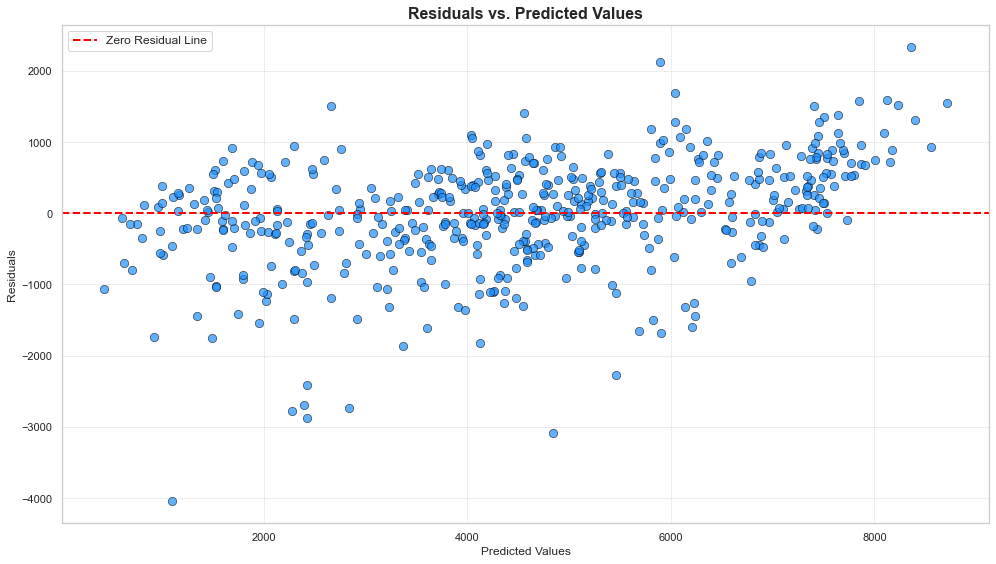

In [48]:


# Enhanced Residual vs Predicted Values Plot
plt.figure(figsize=(14, 8))  # Larger plot size for better visualization
sns.scatterplot(
    x=y_train,
    y=y_train - y_train_pred,
    color='dodgerblue',
    edgecolor='black',
    alpha=0.7,
    s=70,  # Size of scatter points
)
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Residual Line')  # Highlight the zero residual line
plt.title('Residuals vs. Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.legend(fontsize=12, loc='upper left')  # Adding a legend for clarity
plt.grid(visible=True, linestyle='--', linewidth=0.5)  # Subtle grid for better readability
plt.tight_layout()
plt.show()


### Error term Trend verification
### Observations:
* Lagplot of residuals shows no trend. Hence the error terms have constant variance.

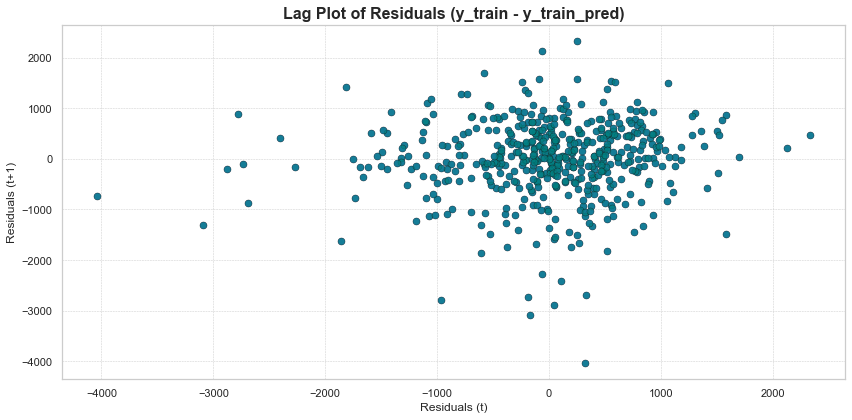

In [47]:
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt

# Enhanced Lag Plot
plt.figure(figsize=(12, 6))  # Setting a larger plot size for better visuals
lag_plot(y_train - y_train_pred, lag=1, ax=None)  # Avoid passing `color` directly here
plt.scatter(
    y_train[:-1] - y_train_pred[:-1], 
    y_train[1:] - y_train_pred[1:], 
    alpha=0.7, 
    c='teal', 
    edgecolor='k', 
    linewidth=0.5, 
    s=50
)
plt.title('Lag Plot of Residuals (y_train - y_train_pred)', fontsize=16, fontweight='bold')
plt.xlabel('Residuals (t)', fontsize=12)
plt.ylabel('Residuals (t+1)', fontsize=12)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


**Based on all of this analysis, we can confidently conclude that the assumptions of Linear Regression are met by this model.**

In [37]:
y_test = Df_Test.pop('cnt')
X_test = Df_Test
X_test[num_vars] = numerical_scaler.transform(X_test[num_vars])
X_test = X_test[selected_features]

In [38]:
X_test = sm.add_constant(X_test)
y_test_pred = final_model.predict(X_test)

## Model Evaluation:
### Observations :
- Predicted vs observed value plots shows that the model is reasonably accurate

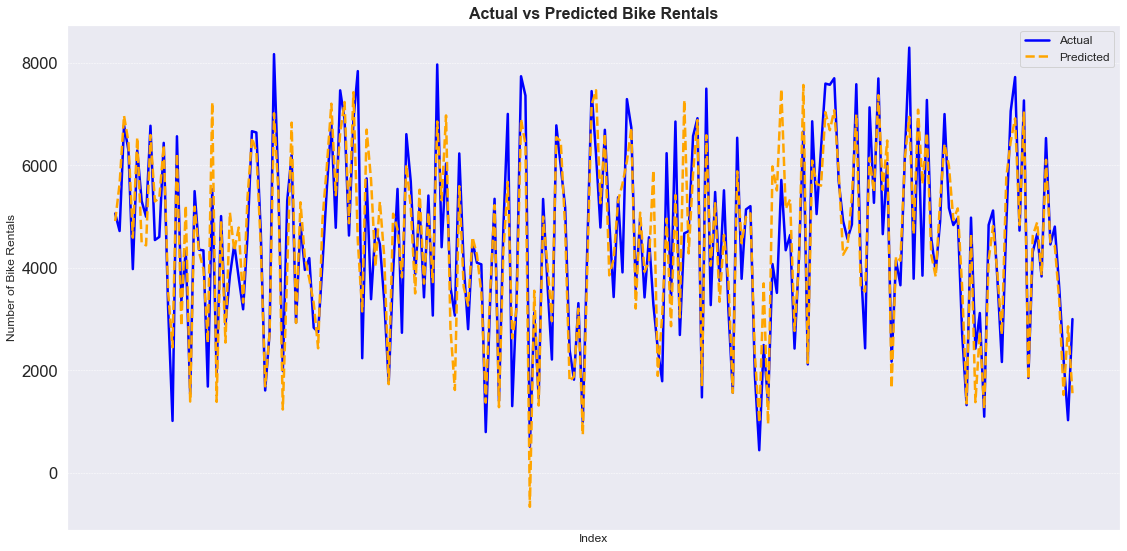

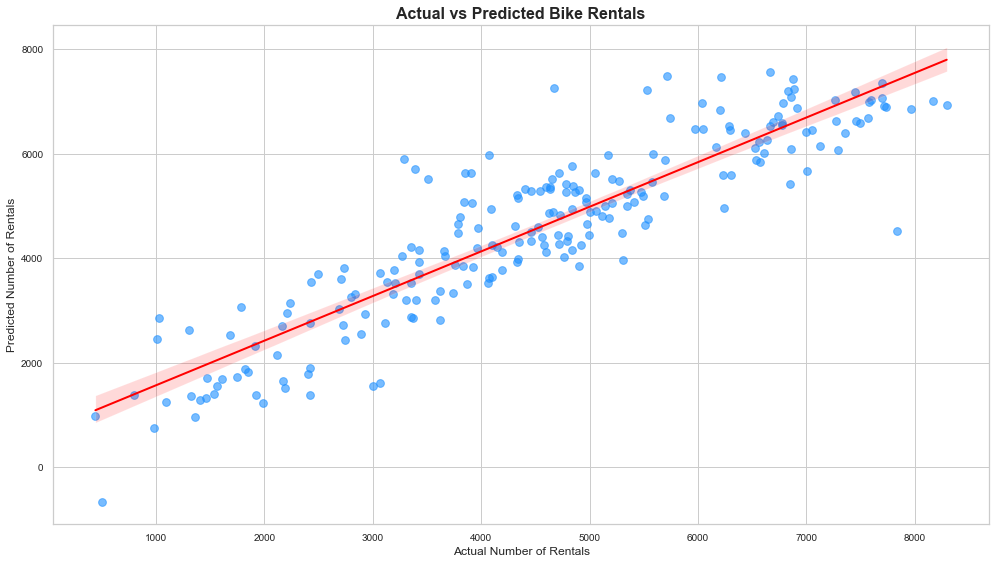

In [40]:

# Plotting Actual vs Predicted Number of Rentals
fig, ax = plt.subplots(figsize=(16, 8))  # Combining figsize directly
ax.plot(range(len(y_test)), y_test, label='Actual', color='blue', linewidth=2.5)
ax.plot(range(len(y_test_pred)), y_test_pred, label='Predicted', color='orange', linestyle='--', linewidth=2.5)
ax.set_title('Actual vs Predicted Bike Rentals', fontsize=16, fontweight='bold')
ax.set_ylabel('Number of Bike Rentals', fontsize=12)
ax.set_xlabel('Index', fontsize=12)
ax.legend(fontsize=12, loc='upper right')
ax.grid(visible=True, linestyle='--', linewidth=0.5)
plt.xticks(ticks=[], labels=[])
plt.tight_layout()
plt.show()

# Plotting y_test vs y_test_pred to understand the spread
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid", palette="muted")
sns.regplot(
    x=y_test,
    y=y_test_pred,
    scatter_kws={'color': 'dodgerblue', 'alpha': 0.6, 's': 60},
    line_kws={'color': 'red', 'lw': 2},
)
plt.title('Actual vs Predicted Bike Rentals', fontsize=16, fontweight='bold')
plt.xlabel('Actual Number of Rentals', fontsize=12)
plt.ylabel('Predicted Number of Rentals', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


## Check R-square on test data:
### Observations:
* We can observe a good correlation value based on R-square value on test set
* R-square values of train and test doesn't shown much variation.

In [41]:

mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))
print('Mean Squared Error',round(mse,3))


R-squared for train data: 0.85
R-squared for test data: 0.81
Mean Squared Error 629379.464


In [42]:
# R-square using cross validation
lr = LinearRegression()
clr = cross_val_score(lr,X_train[selected_features],y_train,cv=10, scoring='r2')
clr

array([0.84076083, 0.84192523, 0.88595519, 0.90357448, 0.69762272,
       0.71609829, 0.84979905, 0.78130097, 0.90482886, 0.8935692 ])

In [43]:
print("R-square at 0.95 confidence level : %0.2f (+/- %0.2f)" % (clr.mean(), clr.std() * 2))

R-square at 0.95 confidence level : 0.83 (+/- 0.14)


In [44]:
selected_features

array(['yr', 'Sat', 'Sep', 'Nov', 'Light Snow', 'Dec', 'winter', 'Mist',
       'spring', 'windspeed', 'hum', 'temp', 'workingday'], dtype=object)

In [45]:
Cofficients = round(final_model.params,2)
beta = Cofficients.sort_values(ascending = False)
beta

temp          3674.84
const         2342.61
yr            2027.49
winter         774.09
Sep            576.40
Sat            448.53
workingday     376.84
Mist          -458.46
Dec           -508.55
Nov           -666.95
windspeed     -845.66
hum           -932.33
spring       -1115.20
Light Snow   -1663.19
dtype: float64

## Final Assessment:

Temperature (temp): Temperature emerges as the most influential factor positively impacting bike rental demand. Warmer temperatures significantly boost rental activity.

Year (yr): The upward trend in bike rentals over the years highlights a consistent positive impact of time progression on demand.

Winter (winter): Demand appears to increase during the winter season, potentially driven by holiday activities and seasonal recreation.

September (Sep): The month of September stands out for elevated rental demand, indicative of favorable weather and heightened activity during this period.

Saturday (Sat): Saturdays see a notable rise in demand, reflecting increased recreational and leisure activities over the weekend.

Working Days (workingday): Rental demand on working days underscores the utility of bikes as a commuting option during weekdays.

Misty Conditions (Mist): Misty weather negatively affects demand, likely due to reduced visibility and comfort.

December (Dec): The colder weather and holiday season in December contribute to reduced rentals.

November (Nov): A decrease in temperature during November correlates with a decline in bike rentals.

Windspeed (windspeed): Higher wind speeds discourage bike rentals, likely due to physical discomfort and increased effort required.